# Part A. 
-  `A.1` (10%) Develop two different scenarios: you should use your own data set in the first scenario. For your first scenario, you shall have n testing cases consisting of n different training/testing data subsets. n should be a number between 5 and 10. Training/testing data ratio should be 80%/20%.

- `A.2` For your second scenario, you shall use another data set by another group in the class, and repeat the same process just described. Training/testing data ratio should be your choice excluding 80%/20%.


In [1]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random forrest 
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# CV Validation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
# Metrics 
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Libraries imported ...")

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Libraries imported ...


In [2]:
# load datasets
loyd_david_df = pd.read_csv("./F24DM-Loyd-David_diabetic_data.csv")
weite_rahib_ben_df = pd.read_csv("./F24DM-Weite-Rahib-Ben_diabetic_data.csv")
print("Datasets read ...")

Datasets read ...


In [3]:
loyd_david_df.head(5)

# x_0_10 -> age 
# x_1_9 -> time_in_hospital
# x_2_3 -> num_medications
# x_3_6 -> num_diagnoses
# x_4_4 -> insulin 
# x_5_4 -> a1cresult
# x_6_3 -> readmitted

,x0_Discrete_10,x1_Discrete_9,x2_Discrete_3,x3_Discrete_6,x4_Discrete_4,x5_Discrete_4,x6_Discrete_3
0,0,1,0,0,0,0,0
1,1,3,0,2,3,0,1
2,2,2,0,1,0,0,0
3,3,2,0,2,3,0,0
4,4,1,0,1,2,0,0


In [4]:
loyd_david_df.shape

(101766, 7)

In [5]:
weite_rahib_ben_df.head(5)

# x1_2 -> a1cresult 
# x2_2 -> readmitted 
# x3_3 -> race 
# x4_1 -> gender 
# x5_2 -> age range 
# x6_1 -> time_in_hospital (days)
# x7_2 -> diag1 

,x1_Discrete_2,x2_Discrete_2,x3_Discrete_2,x4_Discrete_1,x5_Discrete_2,x6_Discrete_1,x7_Discrete_2,x8_Discrete_3
0,0,0,1,0,0,0,2,0
1,0,1,0,1,1,0,0,1
2,0,0,0,0,2,1,0,1
3,0,1,1,0,1,0,0,1
4,0,0,1,1,1,1,1,2


In [6]:
weite_rahib_ben_df.shape

(41481, 8)

# Comparing on decision tree 80-20 split.
## Predicting on Readmitted

In [7]:
# Define features and target for each dataset 
# X1 & y1 --> Loyd and David
X1 = loyd_david_df.drop(columns=['x6_Discrete_3'])  # All columns except target
y1 = loyd_david_df['x6_Discrete_3']
# X2 & y2 --> Weite, Rahib, and Ben 
X2 = weite_rahib_ben_df.drop(columns=['x2_Discrete_2'])  # All columns except target
y2 = weite_rahib_ben_df['x2_Discrete_2']

# Split datasets into train and test sets (80-20 split)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train Decision Tree models
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X1_train, y1_train)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X2_train, y2_train)

# Make predictions
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

# Evaluate models
print("Metrics for Loyd-David Dataset (x1, y1):")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

print("\nMetrics for Weite-Rahib-Ben Dataset (x2, y2):")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))


Metrics for Loyd-David Dataset (x1, y1):
Accuracy: 0.5314434509187383
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.91      0.68     10952
           1       0.41      0.12      0.19      7117
           2       0.19      0.01      0.02      2285

    accuracy                           0.53     20354
   macro avg       0.38      0.35      0.30     20354
weighted avg       0.46      0.53      0.43     20354


Metrics for Weite-Rahib-Ben Dataset (x2, y2):
Accuracy: 0.535374231649994
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.92      0.69      4488
           1       0.41      0.12      0.18      2852
           2       0.12      0.00      0.00       957

    accuracy                           0.54      8297
   macro avg       0.36      0.34      0.29      8297
weighted avg       0.45      0.54      0.43      8297



# Predicting on A1CResult

In [8]:
# Define features and target for each dataset 
# X1 & y1 --> Loyd and David
X1 = loyd_david_df.drop(columns=['x5_Discrete_4'])  # All columns except target
y1 = loyd_david_df['x5_Discrete_4']
# X2 & y2 --> Weite, Rahib, and Ben 
X2 = weite_rahib_ben_df.drop(columns=['x1_Discrete_2'])  # All columns except target
y2 = weite_rahib_ben_df['x1_Discrete_2']

# Split datasets into train and test sets (80-20 split)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train Decision Tree models
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X1_train, y1_train)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X2_train, y2_train)

# Make predictions
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

# Evaluate models
print("Metrics for Loyd-David Dataset (x1, y1):")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

print("\nMetrics for Weite-Rahib-Ben Dataset (x2, y2):")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))


Metrics for Loyd-David Dataset (x1, y1):
Accuracy: 0.8315810160165078
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     16970
           1       0.08      0.00      0.00       947
           2       0.00      0.00      0.00       821
           3       0.39      0.04      0.07      1616

    accuracy                           0.83     20354
   macro avg       0.33      0.26      0.25     20354
weighted avg       0.73      0.83      0.76     20354


Metrics for Weite-Rahib-Ben Dataset (x2, y2):
Accuracy: 0.602627455706882
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.95      0.74      4937
           1       0.48      0.14      0.21      2369
           2       0.26      0.01      0.01       991

    accuracy                           0.60      8297
   macro avg       0.45      0.36      0.32      8297
weighted avg       0.53      0.60      0.51   

# Running CV on 5 splits - 90 - 10 data split 

## Readmitted

Metrics per fold for Loyd-David Dataset (x1, y1):
   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.526477   0.363822  0.341614  0.292373
1     2  0.526368   0.382446  0.342506  0.294657
2     3  0.528606   0.362487  0.343490  0.295134
3     4  0.529479   0.377760  0.343521  0.293355
4     5  0.526724   0.371650  0.342957  0.295743

Metrics per fold for Weite-Rahib-Ben Dataset (x2, y2):
   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.539306   0.349416  0.345155  0.288373
1     2  0.530601   0.377027  0.341234  0.288202
2     3  0.533083   0.401566  0.343367  0.291922
3     4  0.537369   0.345086  0.344761  0.290124
4     5  0.533351   0.388015  0.341574  0.285599

Average Metrics for Loyd-David Dataset:
Fold         3.000000
Accuracy     0.527531
Precision    0.371633
Recall       0.342818
F1 Score     0.294253
dtype: float64

Average Metrics for Weite-Rahib-Ben Dataset:
Fold         3.000000
Accuracy     0.534742
Precision    0.372222
Recall       0.343218
F1 Sco

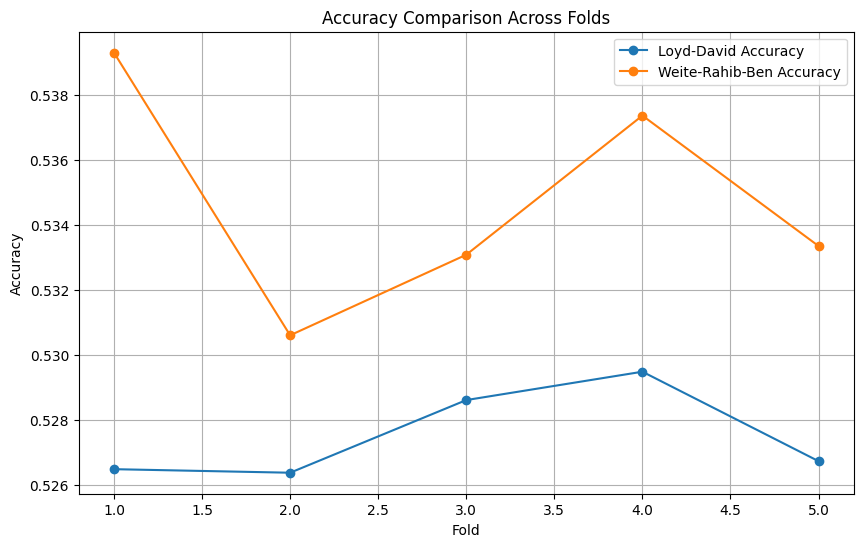

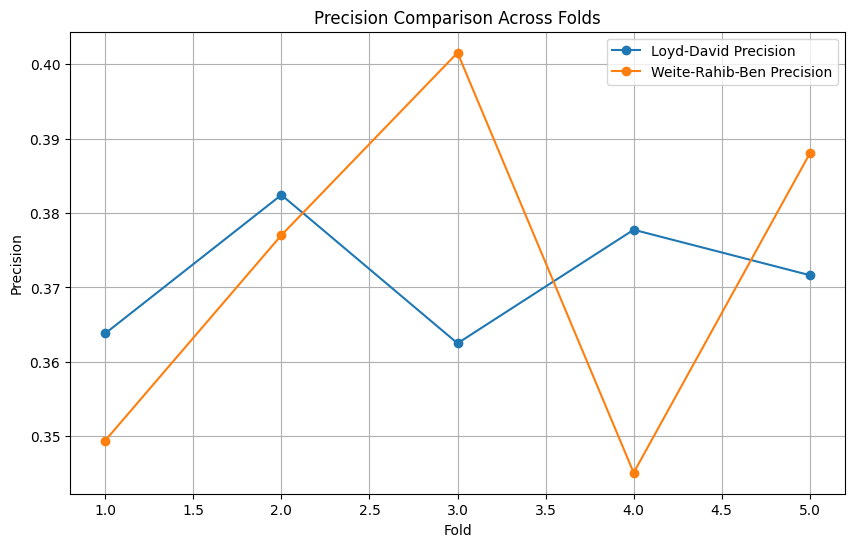

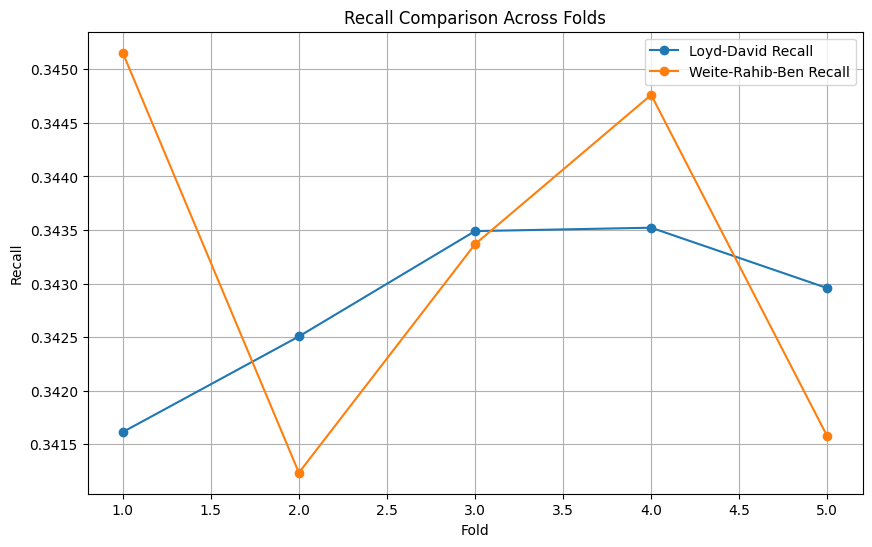

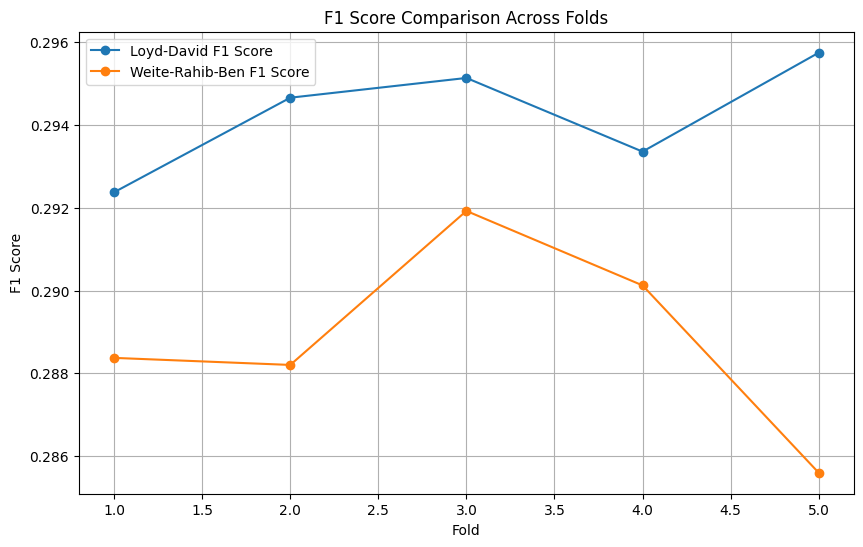

In [9]:
# Load datasets
loyd_david_df = pd.read_csv("./F24DM-Loyd-David_diabetic_data.csv")
weite_rahib_ben_df = pd.read_csv("./F24DM-Weite-Rahib-Ben_diabetic_data.csv")

# Define features and target for each dataset
X1 = loyd_david_df.drop(columns=['x6_Discrete_3'])  # All columns except target
y1 = loyd_david_df['x6_Discrete_3']

X2 = weite_rahib_ben_df.drop(columns=['x2_Discrete_2'])  # All columns except target
y2 = weite_rahib_ben_df['x2_Discrete_2']

# Perform 90-10 Train-Test Split for both datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=42)

# Define the Decision Tree Classifier
model1 = DecisionTreeClassifier(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)

# Perform 5-Fold Cross Validation for Loyd-David Dataset
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results1 = cross_validate(model1, X1_train, y1_train, cv=5, scoring=scoring, return_train_score=True)
cv_results2 = cross_validate(model2, X2_train, y2_train, cv=5, scoring=scoring, return_train_score=True)

# Store results in matrices
results_matrix1 = pd.DataFrame({
    'Fold': range(1, 6),
    'Accuracy': cv_results1['test_accuracy'],
    'Precision': cv_results1['test_precision_macro'],
    'Recall': cv_results1['test_recall_macro'],
    'F1 Score': cv_results1['test_f1_macro']
})

results_matrix2 = pd.DataFrame({
    'Fold': range(1, 6),
    'Accuracy': cv_results2['test_accuracy'],
    'Precision': cv_results2['test_precision_macro'],
    'Recall': cv_results2['test_recall_macro'],
    'F1 Score': cv_results2['test_f1_macro']
})

# Print results per fold
print("Metrics per fold for Loyd-David Dataset (x1, y1):")
print(results_matrix1)
print("\nMetrics per fold for Weite-Rahib-Ben Dataset (x2, y2):")
print(results_matrix2)

# Print average metrics
print("\nAverage Metrics for Loyd-David Dataset:")
print(results_matrix1.mean())

print("\nAverage Metrics for Weite-Rahib-Ben Dataset:")
print(results_matrix2.mean())

# Create comparison charts for each metric across folds
folds = range(1, 6)

# Accuracy comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_accuracy'], label='Loyd-David Accuracy', marker='o')
plt.plot(folds, cv_results2['test_accuracy'], label='Weite-Rahib-Ben Accuracy', marker='o')
plt.title('Accuracy Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Precision comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_precision_macro'], label='Loyd-David Precision', marker='o')
plt.plot(folds, cv_results2['test_precision_macro'], label='Weite-Rahib-Ben Precision', marker='o')
plt.title('Precision Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Recall comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_recall_macro'], label='Loyd-David Recall', marker='o')
plt.plot(folds, cv_results2['test_recall_macro'], label='Weite-Rahib-Ben Recall', marker='o')
plt.title('Recall Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

# F1 Score comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_f1_macro'], label='Loyd-David F1 Score', marker='o')
plt.plot(folds, cv_results2['test_f1_macro'], label='Weite-Rahib-Ben F1 Score', marker='o')
plt.title('F1 Score Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

## A1Cresult

Metrics per fold for Loyd-David Dataset (x1, y1):
   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.830604   0.351656  0.259451  0.247154
1     2  0.830495   0.319696  0.257536  0.243563
2     3  0.827492   0.309400  0.256710  0.243084
3     4  0.829403   0.364117  0.258566  0.245776
4     5  0.828138   0.305454  0.256240  0.241933

Metrics per fold for Weite-Rahib-Ben Dataset (x2, y2):
   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.605330   0.418140  0.363567  0.327138
1     2  0.602786   0.399172  0.366329  0.334278
2     3  0.601929   0.392190  0.357310  0.316320
3     4  0.605009   0.391368  0.360136  0.320330
4     5  0.604340   0.426421  0.364606  0.329943

Average Metrics for Loyd-David Dataset:
Fold         3.000000
Accuracy     0.829226
Precision    0.330065
Recall       0.257701
F1 Score     0.244302
dtype: float64

Average Metrics for Weite-Rahib-Ben Dataset:
Fold         3.000000
Accuracy     0.603879
Precision    0.405458
Recall       0.362389
F1 Sco

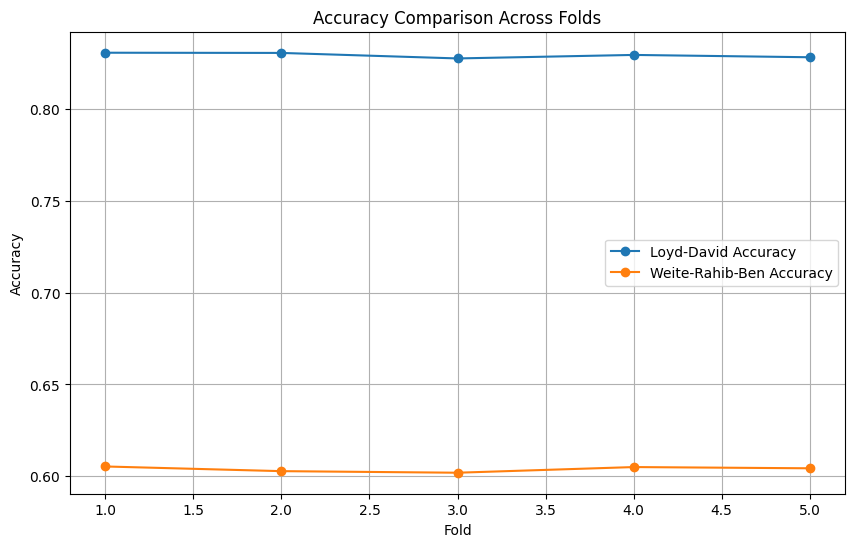

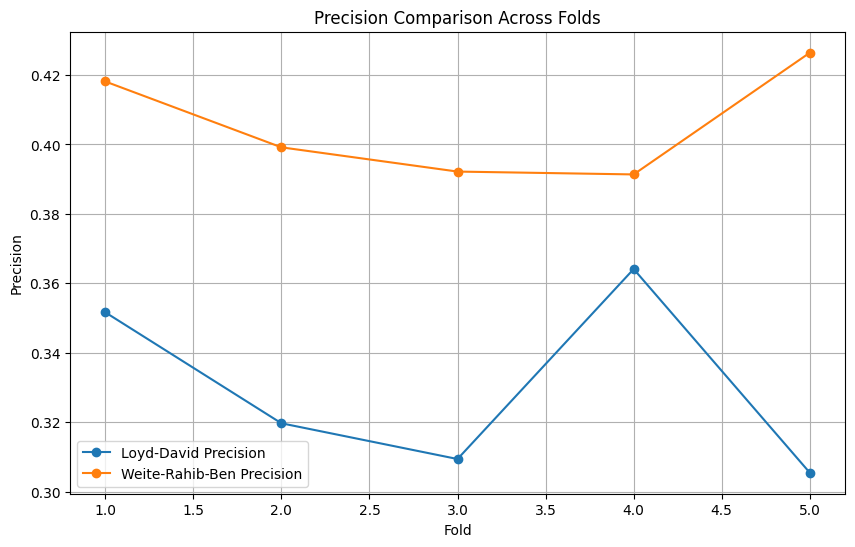

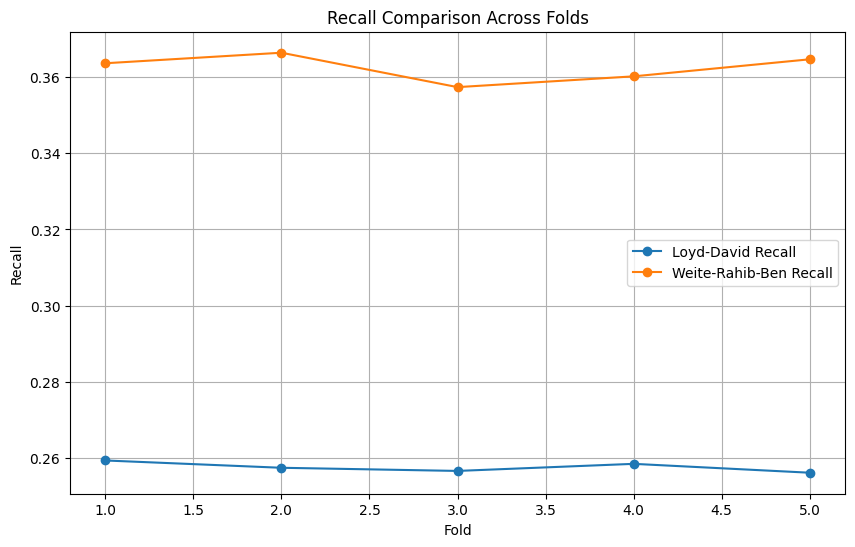

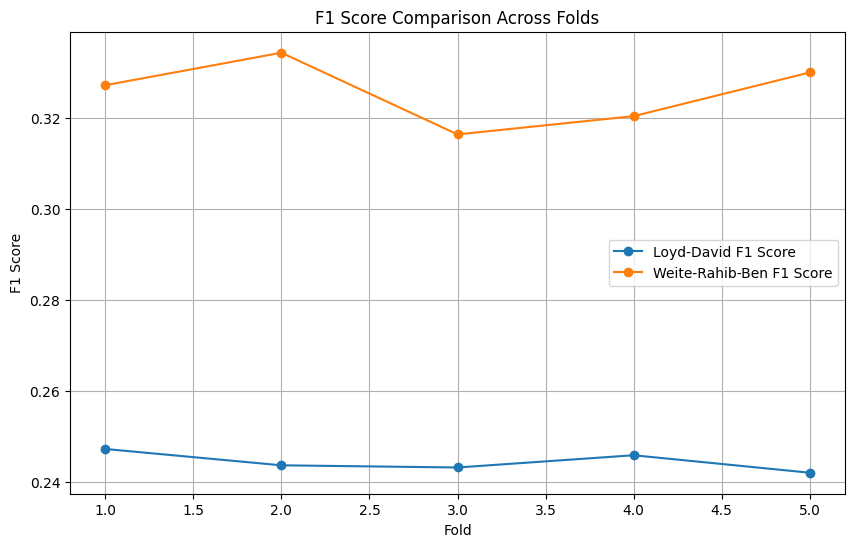

In [10]:
# Load datasets
loyd_david_df = pd.read_csv("./F24DM-Loyd-David_diabetic_data.csv")
weite_rahib_ben_df = pd.read_csv("./F24DM-Weite-Rahib-Ben_diabetic_data.csv")

# Define features and target for each dataset
X1 = loyd_david_df.drop(columns=['x5_Discrete_4'])  # All columns except target
y1 = loyd_david_df['x5_Discrete_4']

X2 = weite_rahib_ben_df.drop(columns=['x1_Discrete_2'])  # All columns except target
y2 = weite_rahib_ben_df['x1_Discrete_2']

# Perform 90-10 Train-Test Split for both datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=42)

# Define the Decision Tree Classifier
model1 = DecisionTreeClassifier(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)

# Perform 5-Fold Cross Validation for Loyd-David Dataset
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results1 = cross_validate(model1, X1_train, y1_train, cv=5, scoring=scoring, return_train_score=True)
cv_results2 = cross_validate(model2, X2_train, y2_train, cv=5, scoring=scoring, return_train_score=True)

# Store results in matrices
results_matrix1 = pd.DataFrame({
    'Fold': range(1, 6),
    'Accuracy': cv_results1['test_accuracy'],
    'Precision': cv_results1['test_precision_macro'],
    'Recall': cv_results1['test_recall_macro'],
    'F1 Score': cv_results1['test_f1_macro']
})

results_matrix2 = pd.DataFrame({
    'Fold': range(1, 6),
    'Accuracy': cv_results2['test_accuracy'],
    'Precision': cv_results2['test_precision_macro'],
    'Recall': cv_results2['test_recall_macro'],
    'F1 Score': cv_results2['test_f1_macro']
})

# Print results per fold
print("Metrics per fold for Loyd-David Dataset (x1, y1):")
print(results_matrix1)
print("\nMetrics per fold for Weite-Rahib-Ben Dataset (x2, y2):")
print(results_matrix2)

# Print average metrics
print("\nAverage Metrics for Loyd-David Dataset:")
print(results_matrix1.mean())

print("\nAverage Metrics for Weite-Rahib-Ben Dataset:")
print(results_matrix2.mean())

# Create comparison charts for each metric across folds
folds = range(1, 6)

# Accuracy comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_accuracy'], label='Loyd-David Accuracy', marker='o')
plt.plot(folds, cv_results2['test_accuracy'], label='Weite-Rahib-Ben Accuracy', marker='o')
plt.title('Accuracy Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Precision comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_precision_macro'], label='Loyd-David Precision', marker='o')
plt.plot(folds, cv_results2['test_precision_macro'], label='Weite-Rahib-Ben Precision', marker='o')
plt.title('Precision Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Recall comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_recall_macro'], label='Loyd-David Recall', marker='o')
plt.plot(folds, cv_results2['test_recall_macro'], label='Weite-Rahib-Ben Recall', marker='o')
plt.title('Recall Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

# F1 Score comparison
plt.figure(figsize=(10, 6))
plt.plot(folds, cv_results1['test_f1_macro'], label='Loyd-David F1 Score', marker='o')
plt.plot(folds, cv_results2['test_f1_macro'], label='Weite-Rahib-Ben F1 Score', marker='o')
plt.title('F1 Score Comparison Across Folds')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()
